# APTOS19 Dataset for DR grading / Lesion segmentation/detection

# IMAGE PREPROCESSING

Image preprocessing is a necessary step to remove the noise from images, to enhance image features and to ensure the consistency of images. The following paragraph discusses the most common preprocessing techniques that have been used recently in researches.

## Feature extraction 

# Application

In [141]:
import numpy as np
import os
from skimage import exposure
from skimage.filters import laplace,sobel,hessian,gaussian,frangi,gabor
from skimage.restoration import denoise_tv_chambolle,denoise_tv_bregman,denoise_wavelet,denoise_nl_means
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import warnings 
warnings.filterwarnings('ignore')

## Importing the dataset

## Resize

Many researchers resized the images to a fixed resolution to be suitable for the used network.For our project we resized the images to 224 by 224.

In [142]:
#Test Data
test_df = pd.read_csv('/kaggle/input/aptos2019/test.csv').head(150)

test_data = []
test_labels = []

image_size = (224,224)

for index, row in test_df.iterrows():
    image_path = f"/kaggle/input/aptos2019/test_images/test_images/{row['id_code']}.png"
    image = cv2.imread(image_path,cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)
    test_data.append(image)
    test_labels.append(row['diagnosis'])
    
x_test = np.array(test_data)
y_test = np.array(test_labels, dtype=np.int32)
y_test = to_categorical(y_test)

In [143]:
print(X_test.shape)
print(y_test.shape)

(10, 224, 224, 3)
(10,)


(-0.5, 223.5, 223.5, -0.5)

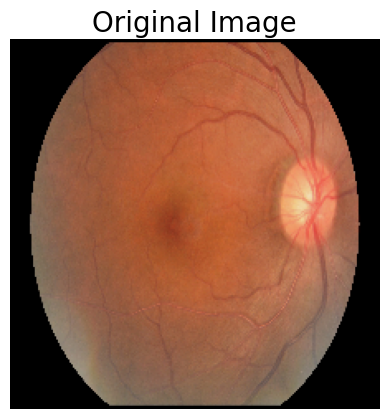

In [144]:
image = X_test[0]
# Visualize original and preprocessed images
plt.imshow(image)  # original image
plt.title('Original Image',fontsize=20)
plt.axis('off')

## Normalization 

When normalizing our image we focused on converting images similar distribution

In [112]:
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)).astype(np.float32)
X_test = np.reshape(X_test, (-1, 224, 224, 3))

(-0.5, 223.5, 223.5, -0.5)

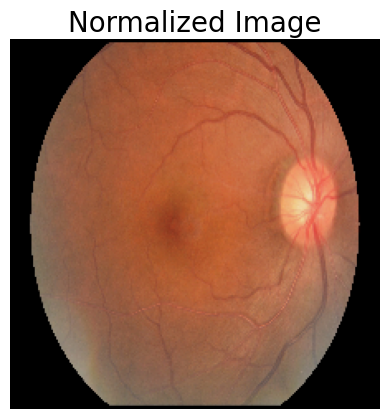

In [113]:
image = X_test[0]
# Visualize original and preprocessed images
plt.imshow(image)  # original image
plt.title('Normalized Image',fontsize=20)
plt.axis('off')

## Color Space Conversion

In some works, only the green channel of images was extracted
due to its high contrast, the images were converted into
grayscale

In [8]:
def green_channel_gray(images):
    gray_images = []
    for img in images:
        # Split the image into RGB channels
        b, g, r = cv2.split(img)
        # Use the green channel as grayscale
        gray_img = g
        # Append the grayscale image to the list
        gray_images.append(gray_img)
        
    gray_images = np.array(gray_images)
    return gray_images

X_test = green_channel_gray(X_test)

(-0.5, 223.5, 223.5, -0.5)

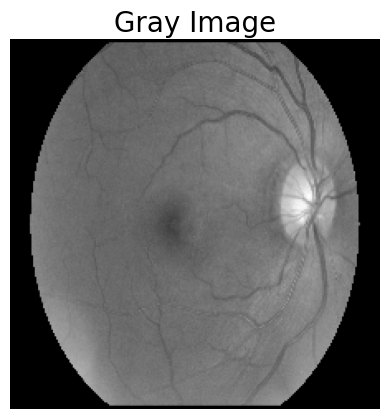

In [9]:
image = X_test[0]

# Visualize gray image
plt.imshow(image,cmap='gray')  # gray image image
plt.title('Gray Image',fontsize=20)
plt.axis('off')

## Noise Reduction

methods include a median filter, Gaussian
filter, and NonLocal Means Denoising methods.

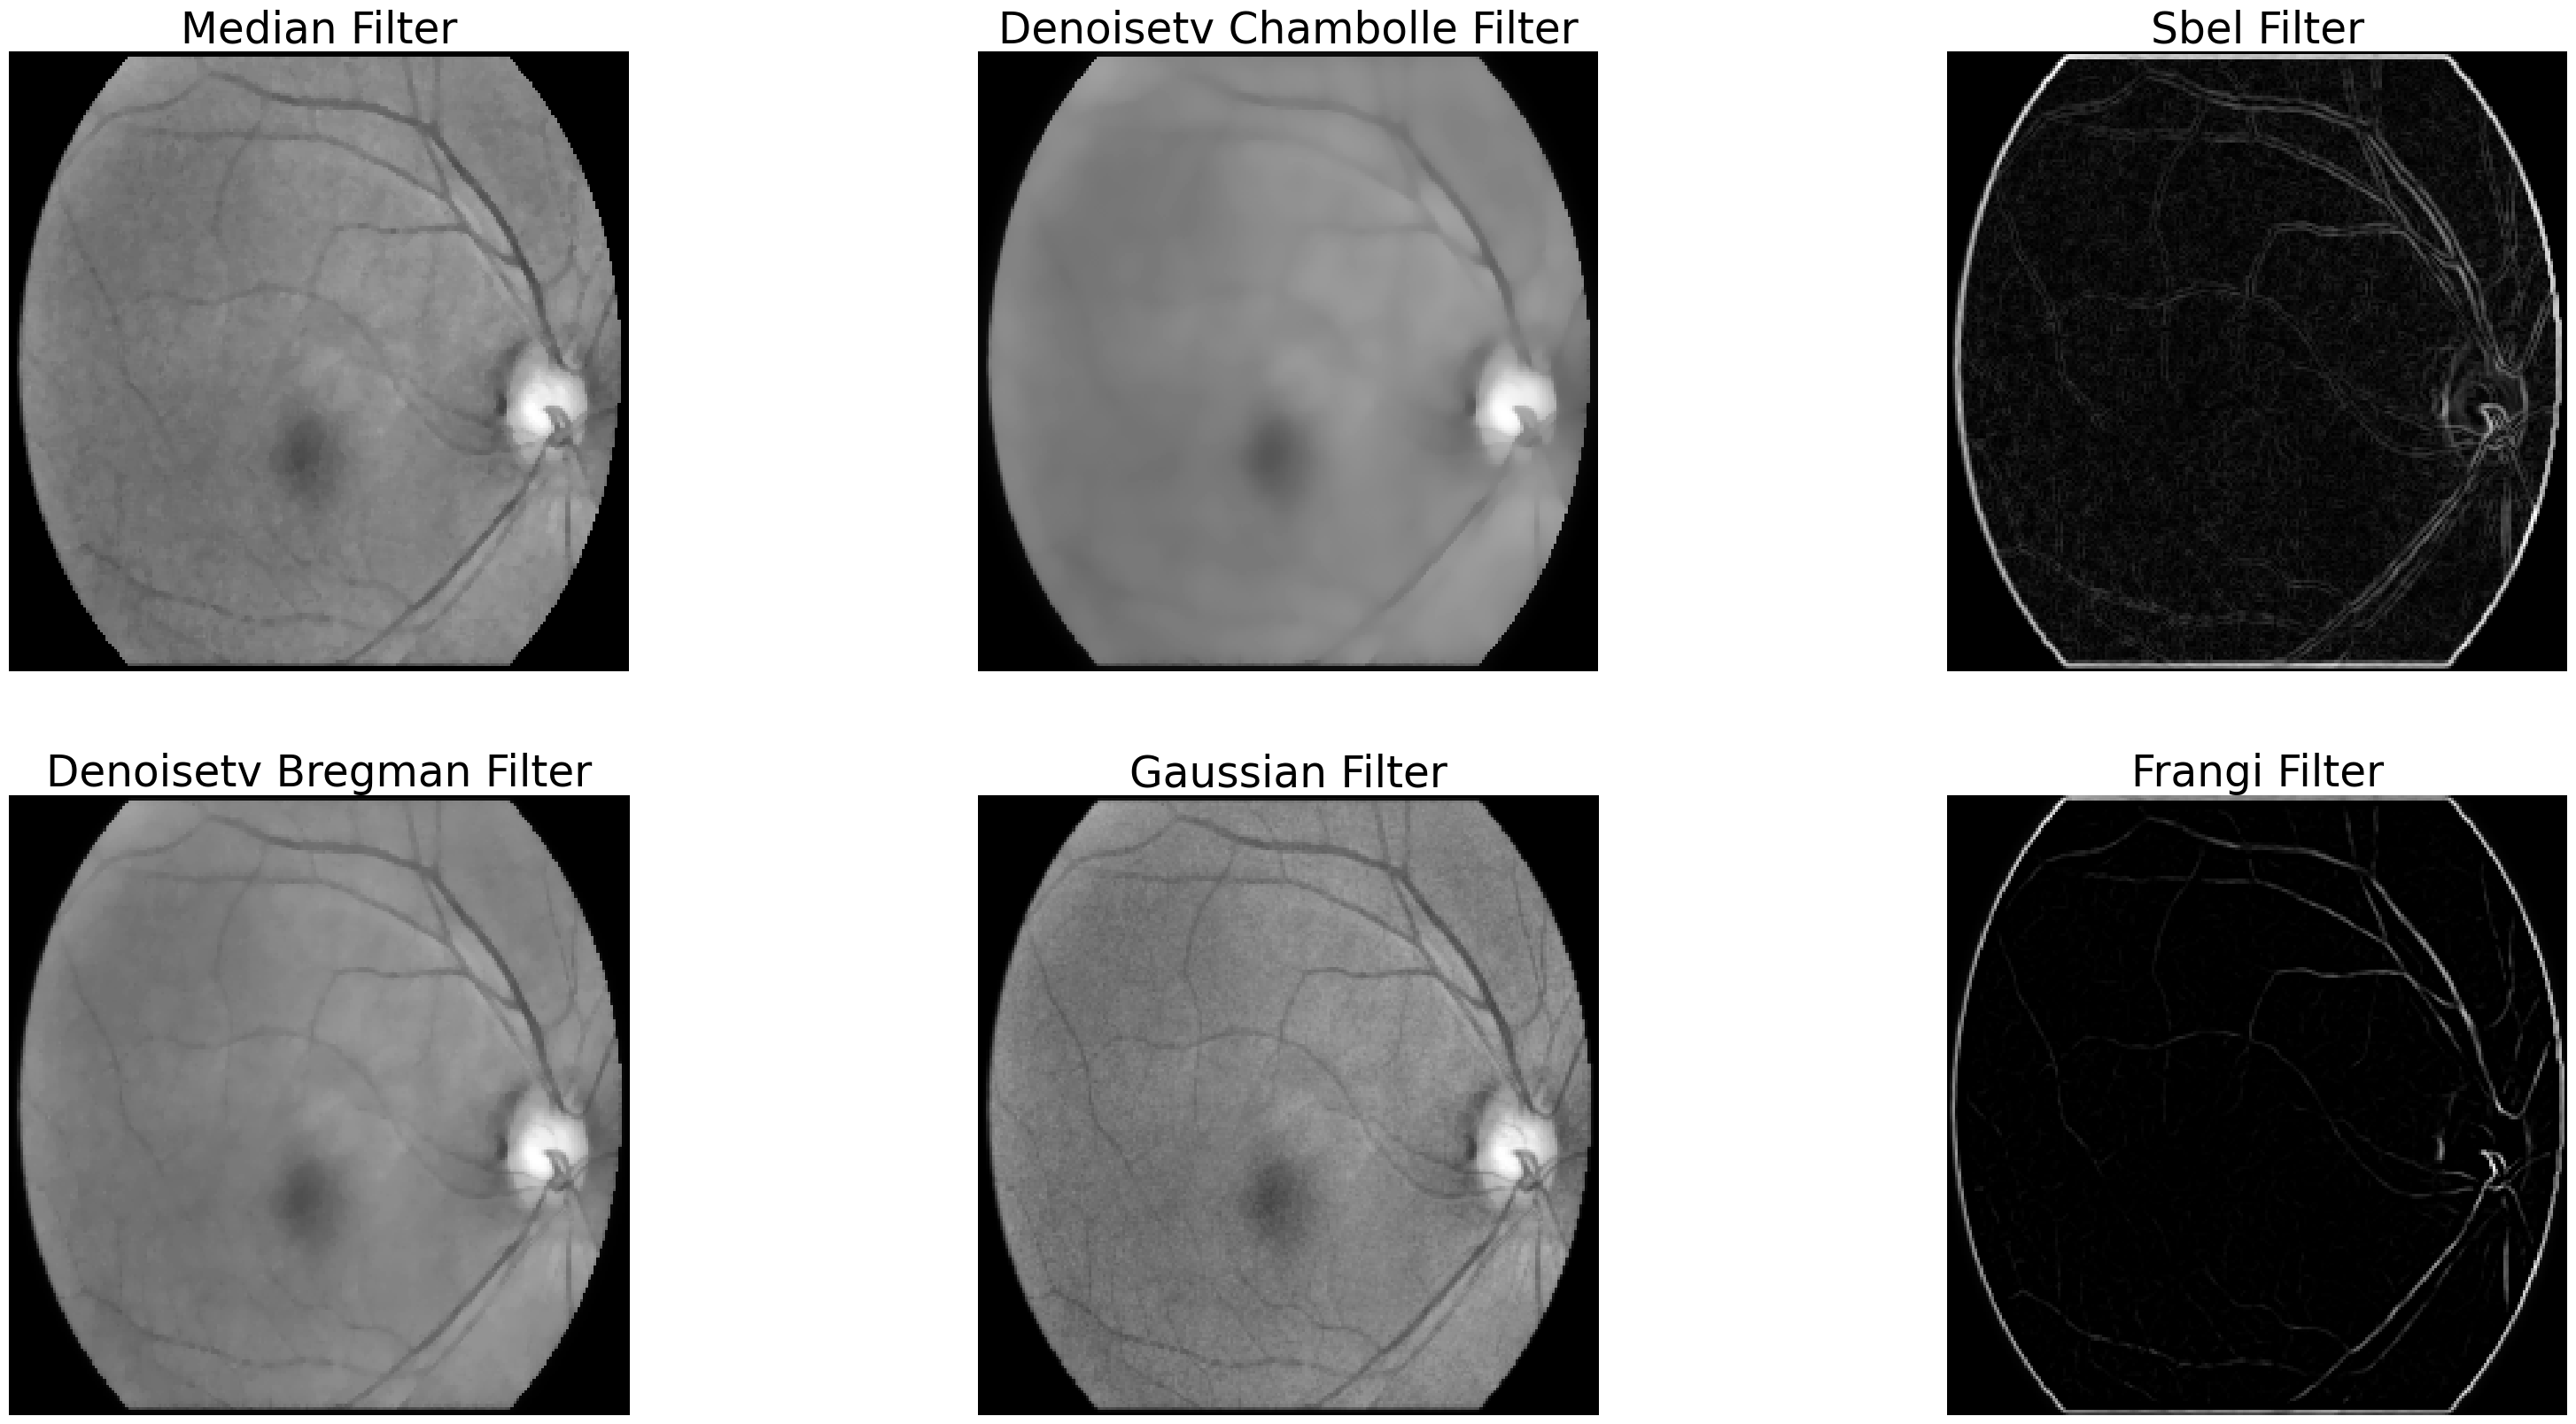

In [10]:
plt.figure(figsize=(40, 20))
# Do Preporcessing fonction 

image = X_test[2]
image = exposure.equalize_adapthist(image,nbins=256)

plt.subplot(2, 3, 1)
plt.imshow(cv2.medianBlur(image, 3),cmap='gray')
plt.title('Median Filter',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(denoise_tv_chambolle(image, weight=0.1),cmap="gray")
plt.title('Denoisetv Chambolle Filter',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel(image),cmap='gray')
plt.title('Sbel Filter',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(denoise_tv_bregman(image, weight=20),cmap="gray")
plt.title('Denoisetv Bregman Filter',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gaussian(image,sigma=0.5),cmap="gray")
plt.title('Gaussian Filter',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(frangi(image),cmap="gray")
plt.title('Frangi Filter',fontsize=35)
plt.axis('off')

plt.show()

we can see that the best one for noice reduction is gaussian filter

In [11]:
def do_gaussian(images):
    filtered_images =[]
    for image in images:
        filtered_images.append(gaussian(image,sigma=0.5))
        
    filtered_images = np.array(filtered_images)
    
    return filtered_images

X_test = do_gaussian(X_test)

## Data augmentation

Data augmentation
techniques were performed when some image classes were
imbalance or to increase the dataset size. Data augmentation technique include translation,
rotation, shearing, flipping, contrast scaling and rescaling. A
morphological method was used, for contrast
enhancement

### Contrast Enhancements

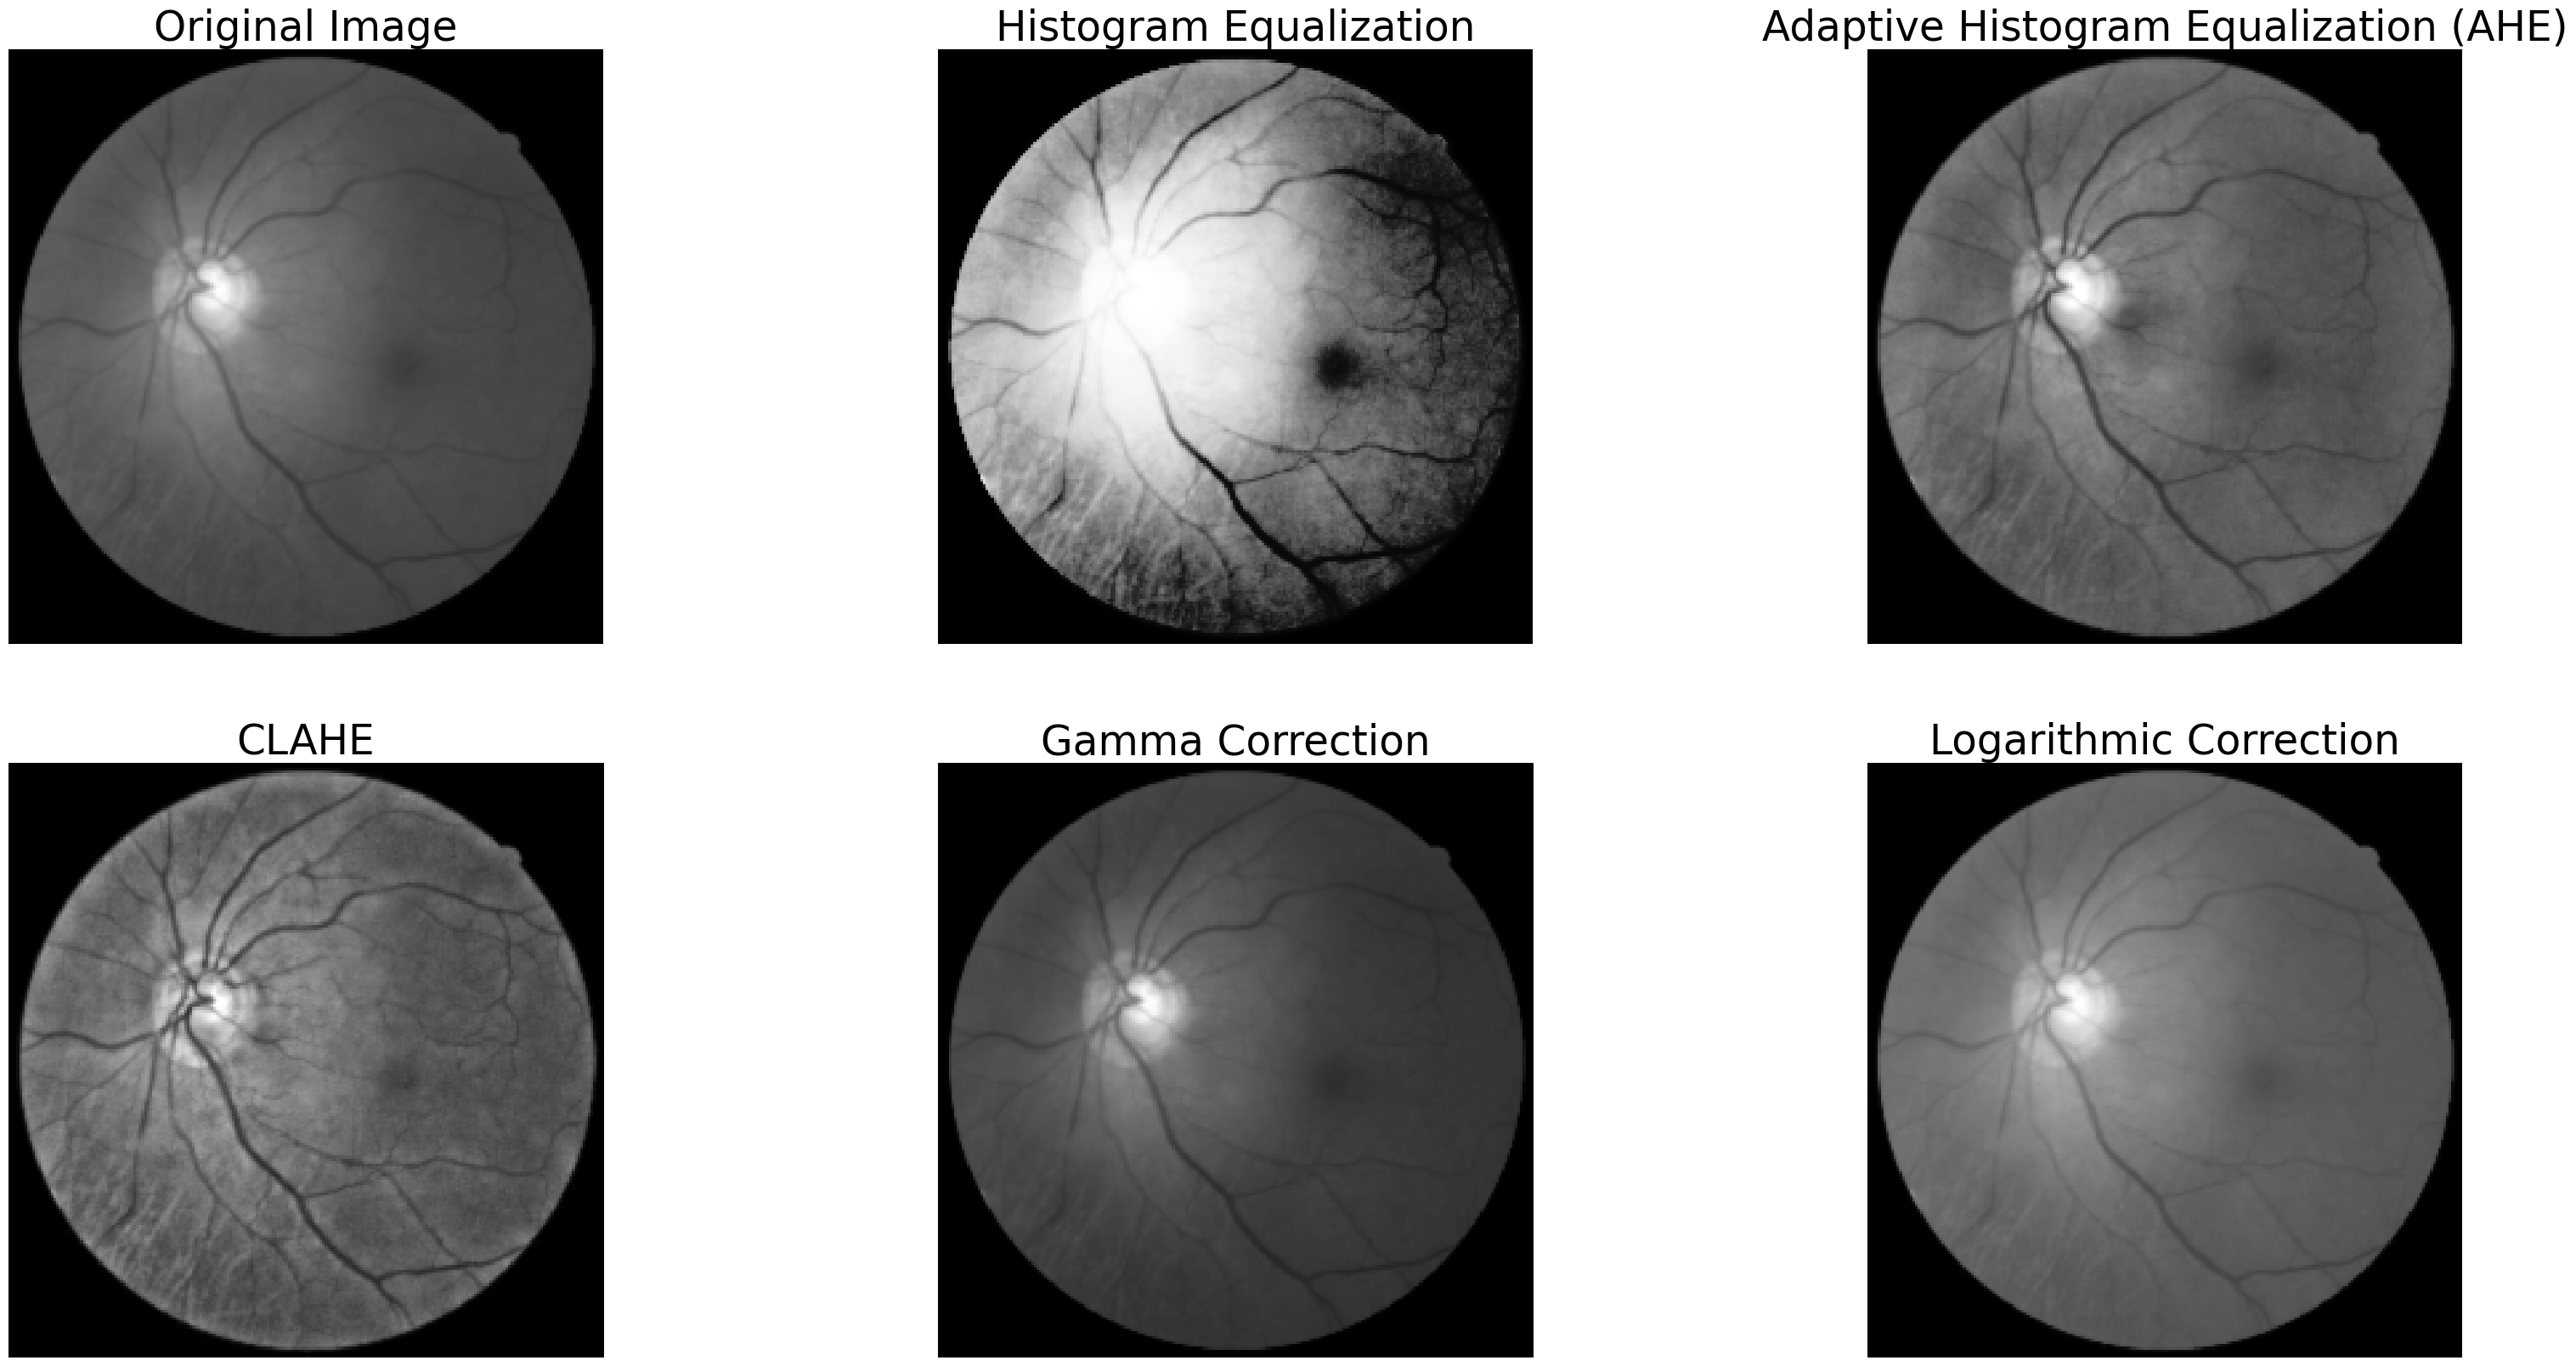

In [12]:
def clahe(image,clip_limit=0.02, kernel_size=(8, 8)):
    # Apply CLAHE
    equalized_image = exposure.equalize_adapthist(image, clip_limit=clip_limit,kernel_size=kernel_size,nbins=256)    
    return equalized_image

plt.figure(figsize=(40, 20))
image = X_test[-6]

plt.subplot(2, 3, 1)
plt.imshow(image,cmap='gray')
plt.title('Original Image',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(exposure.equalize_hist(image),cmap="gray")
plt.title('Histogram Equalization',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(exposure.equalize_adapthist(image,nbins=256),cmap='gray')
plt.title('Adaptive Histogram Equalization (AHE)',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(clahe(image),cmap="gray")
plt.title('CLAHE',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(exposure.adjust_gamma(image, gamma=1.2),cmap="gray")
plt.title('Gamma Correction',fontsize=35)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(exposure.adjust_log(image),cmap="gray")
plt.title('Logarithmic Correction',fontsize=35)
plt.axis('off')
plt.show()

### Translation

(-0.5, 223.5, 223.5, -0.5)

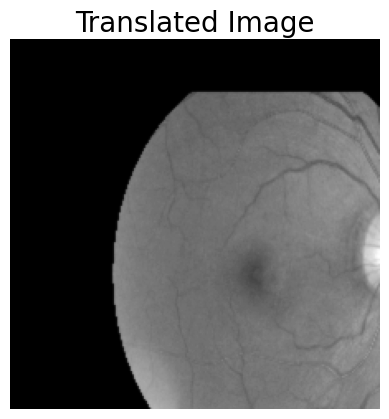

In [13]:
image = X_test[0]
tx = 50  # Translation distance in the x direction (positive: right, negative: left)
ty = 30  # Translation distance in the y direction (positive: down, negative: up)
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

# Apply the translation using warpAffine
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# Visualize Translated Image
plt.imshow(translated_image,cmap='gray')  # Translated Image
plt.title('Translated Image',fontsize=20)
plt.axis('off')

### Rotation

(-0.5, 223.5, 223.5, -0.5)

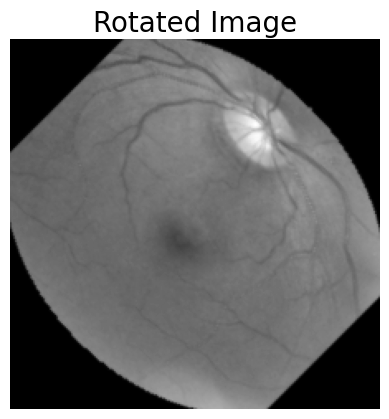

In [14]:
image = X_test[0]
angle = 45 # Specify the rotation angle in degrees

# Get the image center
center = (image.shape[1] / 2, image.shape[0] / 2)

# Generate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)

# Apply the rotation using warpAffine
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Visualize Rotated Image
plt.imshow(rotated_image,cmap='gray')  # Rotated Image
plt.title('Rotated Image',fontsize=20)
plt.axis('off')

In [ ]:
def rotate_image(image):
    angle = 15 # Specify the rotation angle in degrees
    # Get the image center
    center = (image.shape[1] / 2, image.shape[0] / 2)
    # Generate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)
    # Apply the rotation using warpAffine
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    return rotated_image

### Shearing

Shearing an image involves shifting one or more rows or columns of pixels in a certain direction, essentially causing the image to become skewed

(-0.5, 223.5, 223.5, -0.5)

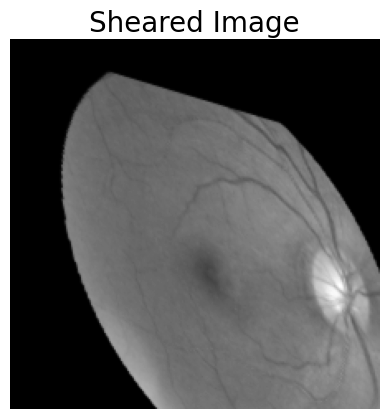

In [15]:
image = X_test[0]
# Define the shear parameters
shear_factor_x = 0.2  # Shear factor along the x-axis
shear_factor_y = 0.3  # Shear factor along the y-axis

# Define the shear matrix
shear_matrix = np.array([[1, shear_factor_x, 0],
                          [shear_factor_y, 1, 0]], dtype=np.float32)

# Apply the shear using warpAffine
sheared_image = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

# Visualize Sheared Image
plt.imshow(sheared_image,cmap='gray')  # Sheared Image
plt.title('Sheared Image',fontsize=20)
plt.axis('off')

### Flipping

(-0.5, 223.5, 223.5, -0.5)

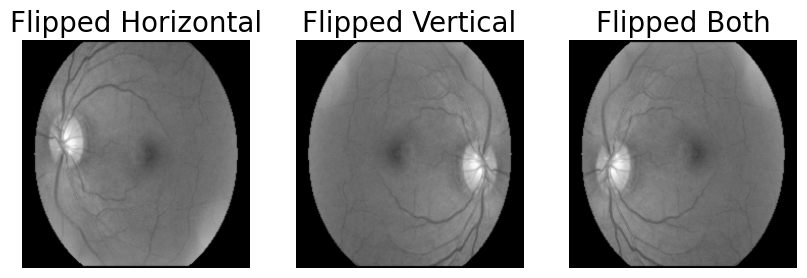

In [16]:
image = X_test[0]
# Flip the image horizontally (around the y-axis)
flipped_horizontal = cv2.flip(image, 1)

# Flip the image vertically (around the x-axis)
flipped_vertical = cv2.flip(image, 0)

# Flip the image both horizontally and vertically
flipped_both = cv2.flip(image, -1)

# Visualize the original and flipped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(flipped_horizontal, cmap='gray')
plt.title('Flipped Horizontal', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(flipped_vertical, cmap='gray')
plt.title('Flipped Vertical', fontsize=20)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(flipped_both, cmap='gray')
plt.title('Flipped Both', fontsize=20)
plt.axis('off')

In [ ]:
def flip_image(image):
    i = random.randint(-1,1)
    if i == 1:
        # Flip the image horizontally (around the y-axis)
        flipped_image = cv2.flip(image, 1)
    if i == 0:
        # Flip the image vertically (around the x-axis)
        flipped_image = cv2.flip(image, 0)
    if i == -1:
        # Flip the image both horizontally and vertically
        flipped_image = cv2.flip(image, -1)
    return flipped_image

## Feature Extraction: Blood Vessels Extraction

### Canny edge detection

(-0.5, 223.5, 223.5, -0.5)

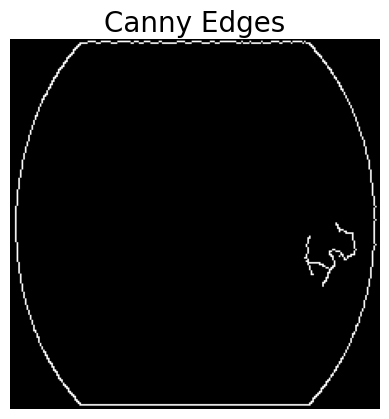

In [17]:
image = X_test[2]
image = (image*255).astype(np.uint8)
# Perform Canny edge detection
edges = cv2.Canny(image, 100, 200) # You can adjust the thresholds according to your needs

# Visualize Canny Edges
plt.imshow(edges,cmap='gray')  # Canny Edges
plt.title('Canny Edges',fontsize=20)
plt.axis('off')

### Frangi Filter 

(-0.5, 223.5, 223.5, -0.5)

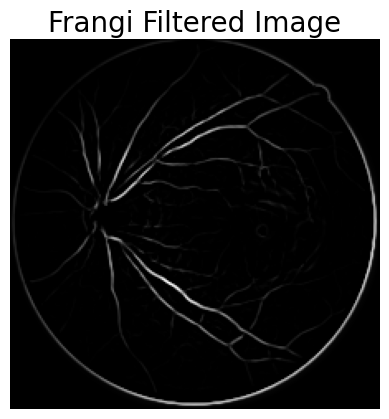

In [18]:
image = X_test[1]
enhanced_image = exposure.equalize_adapthist(image,nbins=256)
filtered_image = frangi(enhanced_image)

# Visualize Frangi
plt.imshow(filtered_image,cmap='gray')  # Frangi
plt.title('Frangi Filtered Image',fontsize=20)
plt.axis('off')

### Sobel Filter

(-0.5, 223.5, 223.5, -0.5)

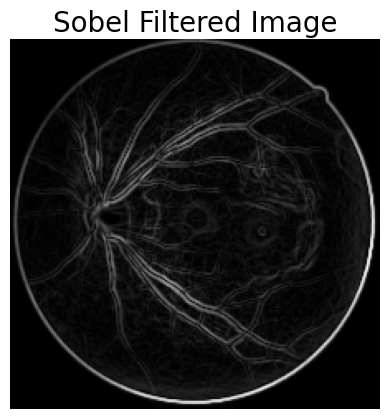

In [19]:
image = X_test[1]
enhanced_image = exposure.equalize_adapthist(image,nbins=256)
filtered_image = sobel(enhanced_image)

# Visualize sobel
plt.imshow(filtered_image,cmap='gray')  # sobel
plt.title('Sobel Filtered Image',fontsize=20)
plt.axis('off')

### Otsu's thresholding segmentation

(-0.5, 223.5, 223.5, -0.5)

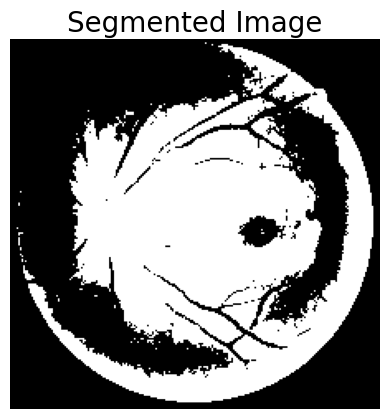

In [20]:
from skimage import filters
image = X_test[1]
enhanced_image = exposure.equalize_adapthist(image,nbins=256)

threshold = filters.threshold_otsu(enhanced_image)
segmented_image = enhanced_image > threshold

# Visualize Segmented Image
plt.imshow(segmented_image,cmap='gray')  # Segmented Image
plt.title('Segmented Image',fontsize=20)
plt.axis('off')

# Retina Blood Vessel dataset

##  Blood Vessel Segmentation U-net

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20220614121231/Group14.jpg'>

In [21]:
images_train_dir ='/kaggle/input/retina-blood-vessel/Data/train/image'
masks_train_dir = '/kaggle/input/retina-blood-vessel/Data/train/mask'

images_test_dir ='/kaggle/input/retina-blood-vessel/Data/test/image'
masks_test_dir = '/kaggle/input/retina-blood-vessel/Data/test/mask'

In [22]:
images_train_listdir = os.listdir(images_train_dir)
masks_train_listdir = os.listdir(masks_train_dir)
print(len(images_train_listdir))
print(len(masks_train_listdir))

images_test_listdir = os.listdir(images_test_dir)
masks_test_listdir = os.listdir(masks_test_dir)
print(len(images_test_listdir))
print(len(masks_test_listdir))

80
80
20
20


In [23]:
input_image_size=(224,224)
image_size = 224

def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(image_size, image_size))
    return image

In [24]:
MASKS=np.zeros((1,image_size, image_size, 1), dtype=bool)
IMAGES=np.zeros((1,image_size, image_size, 3),dtype=np.uint8)

for j,file in enumerate(images_train_listdir):   ##the smaller, the faster
    image = read_image(f"{images_train_dir}/{file}")
    image_ex = np.expand_dims(image, axis=0)
    IMAGES = np.vstack([IMAGES, image_ex])
    mask = read_image(f"{masks_train_dir}/{file}") 
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.reshape(224,224,1)
    mask_ex = np.expand_dims(mask, axis=0)    
    MASKS = np.vstack([MASKS, mask_ex])


images_train=np.array(IMAGES)[1:]
masks_train=np.array(MASKS)[1:]
print(images_train.shape,masks_train.shape)


MASKS=np.zeros((1,image_size, image_size, 1), dtype=bool)
IMAGES=np.zeros((1,image_size, image_size, 3),dtype=np.uint8)

for j,file in enumerate(images_test_listdir):   ##the smaller, the faster
    image = read_image(f"{images_test_dir}/{file}")
    image_ex = np.expand_dims(image, axis=0)
    IMAGES = np.vstack([IMAGES, image_ex])
    mask = read_image(f"{masks_test_dir}/{file}") 
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.reshape(224,224,1)
    mask_ex = np.expand_dims(mask, axis=0)    
    MASKS = np.vstack([MASKS, mask_ex])


images_test=np.array(IMAGES)[1:]
masks_test=np.array(MASKS)[1:]
print(images_test.shape,masks_test.shape)


(80, 224, 224, 3) (80, 224, 224, 1)
(20, 224, 224, 3) (20, 224, 224, 1)


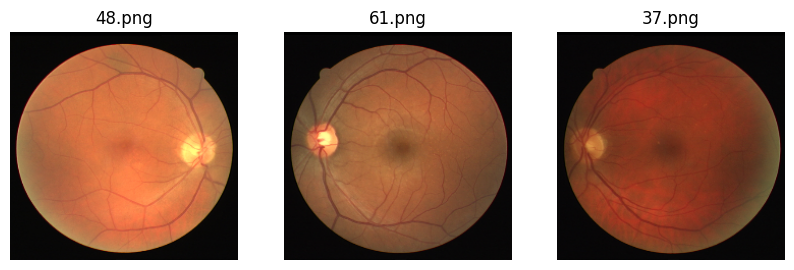

In [25]:
plt.figure(figsize=(10, 5))

for i,image in enumerate(images_train[:3]):
    plt.subplot(1, 3, i+1)
    plt.title(f"{images_train_listdir[i]}")
    plt.imshow(image)
    plt.axis('off')

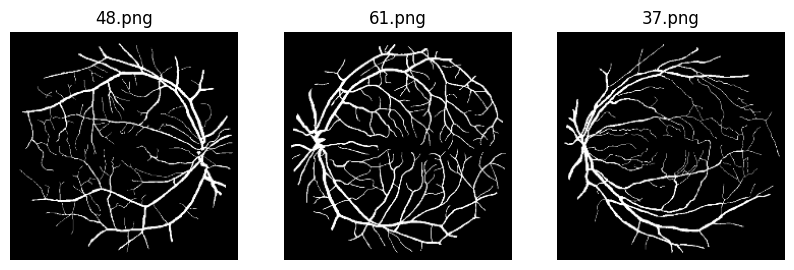

In [26]:
plt.figure(figsize=(10, 5))

for i,mask in enumerate(masks_train[:3]):
    plt.subplot(1, 3, i+1)
    plt.title(f"{masks_train_listdir[i]}")
    plt.imshow(mask,cmap='gray')
    plt.axis('off')

### U-net

In [27]:
import tensorflow as tf

# Define a convolutional block
def conv_block(input, num_filters):
    # Convolution layer with 'num_filters' filters and 3x3 kernel size
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    # Batch normalization to normalize and stabilize the activations
    conv = tf.keras.layers.BatchNormalization()(conv)
    # ReLU activation function to introduce non-linearity
    conv = tf.keras.layers.Activation("relu")(conv)
    # Second convolution layer with 'num_filters' filters and 3x3 kernel size
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    # Batch normalization
    conv = tf.keras.layers.BatchNormalization()(conv)
    # ReLU activation
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

# Define an encoder block
def encoder_block(input, num_filters):
    # Create convolutional block
    skip = conv_block(input, num_filters)
    # Max pooling layer to downsample the spatial dimensions
    pool = tf.keras.layers.MaxPool2D((2,2))(skip)
    return skip, pool

# Define a decoder block
def decoder_block(input, skip, num_filters):
    # Upsampling layer followed by a convolutional layer
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(input)
    # Concatenate the upsampled feature map with the corresponding skip connection from the encoder
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    # Convolutional block to extract features
    conv = conv_block(conv, num_filters)
    return conv

# Define the U-Net architecture
def Unet(input_shape):
    # Input layer
    inputs = tf.keras.layers.Input(input_shape)

    # Encoding path
    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    # Bridge convolutional block
    bridge = conv_block(pool4, 1024)

    # Decoding path
    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)

    # Output layer
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)
    # Define the model with input and output layers
    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [94]:
# Create an instance of the U-Net model with the specified input shape
unet_model = Unet((224,224,3))
# Compile the model with Adam optimizer and binary crossentropy loss
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Print the model summary
unet_model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 224, 224,  │      1,792 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_57[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_54       │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 224, 224,  │     36,928 │ activation_54[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_58[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_55       │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 112, 112,  │          0 │ activation_55[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 112, 112,  │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_59[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_56       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 112, 112,  │    147,584 │ activation_56[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        512 │ conv2d_60[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_57       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 56, 56,    │          0 │ activation_57[0]… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 56, 56,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ conv2d_61[0][0] 

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [95]:
unet_history = unet_model.fit(
    images_train, masks_train, 
    validation_split = 0.2, batch_size = 16, epochs = 40)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 950ms/step - accuracy: 0.3920 - loss: -26.2501 - val_accuracy: 0.8260 - val_loss: 234.7906
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.3442 - loss: -114.5050 - val_accuracy: 0.8321 - val_loss: 6074.5610
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.4531 - loss: -171.8463 - val_accuracy: 0.8321 - val_loss: 16108.4609
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.4820 - loss: -207.4591 - val_accuracy: 0.8321 - val_loss: 11722.4932
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.4190 - loss: -230.8643 - val_accuracy: 0.8321 - val_loss: 6158.9375
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.3534 - loss: -252.2697 - val_accuracy: 0.8293 - val_loss: 11370.0547
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.3301 - loss: -266.5756 - val_accuracy: 0.7862 - val_loss: 2348.8875
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.3348 - los

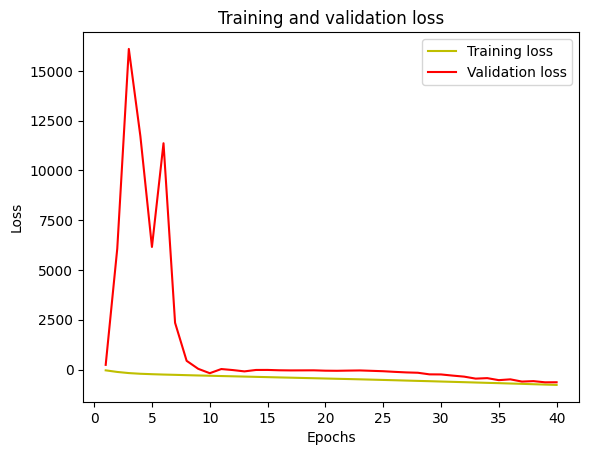

In [96]:
loss = unet_history.history['loss']
val_loss = unet_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

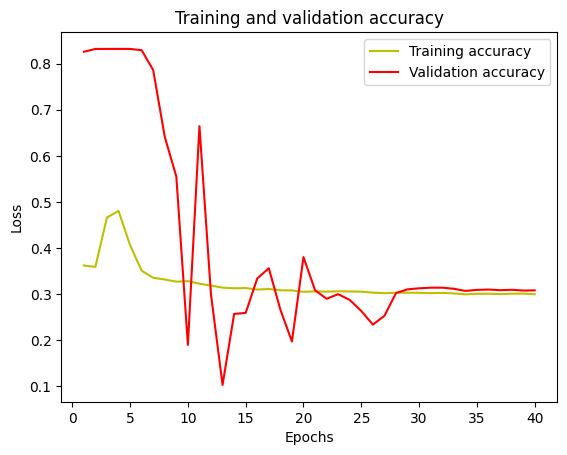

In [103]:
loss = unet_history.history['accuracy']
val_loss = unet_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
unet_predict = unet_model.predict(images_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [99]:
def show_result(idx, og, unet, target, p):
    
    fig, axs = plt.subplots(1, 3, figsize=(12,12))
    axs[0].set_title("Original "+str(idx) )
    axs[0].imshow(og)
    axs[0].axis('off')
    
    axs[1].set_title("U-Net: p>"+str(p))
    axs[1].imshow(unet,cmap='gray')
    axs[1].axis('off')
    
    axs[2].set_title("Ground Truth")
    axs[2].imshow(target,cmap='gray')
    axs[2].axis('off')

    plt.show()

In [100]:
r1,r2,r3,r4=0.7,0.8,0.9,0.99

unet_predict2 = (unet_predict > r2).astype(np.uint8)
unet_predict3 = (unet_predict > r3).astype(np.uint8)
unet_predict4 = (unet_predict > r4).astype(np.uint8)

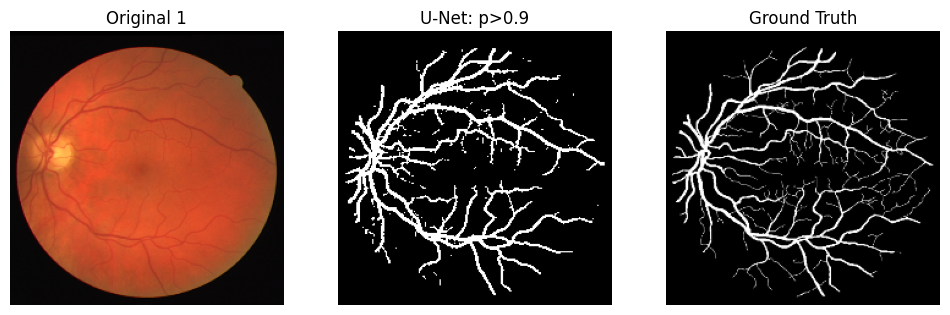

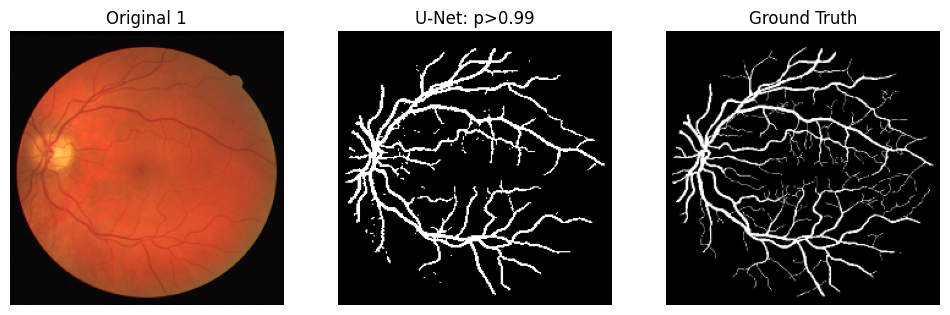

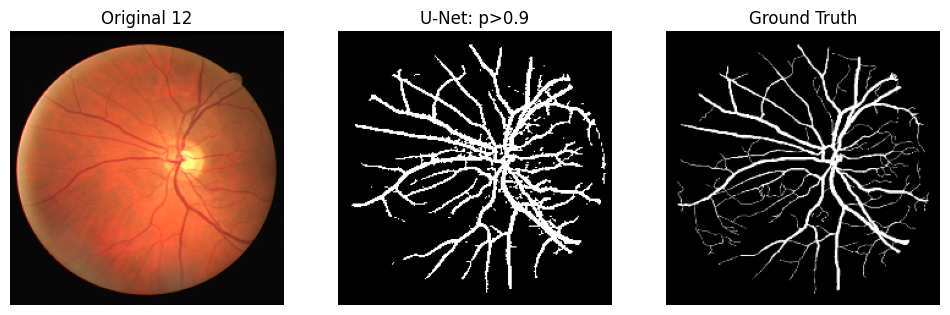

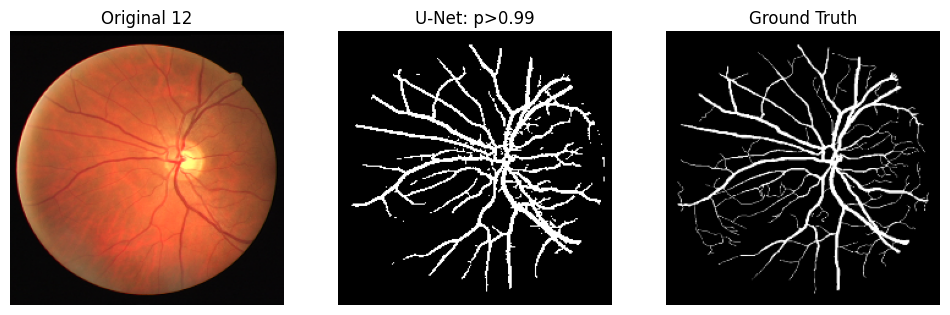

In [148]:
import random
show_test_idx = random.sample(range(len(unet_predict)), 2)
for idx in show_test_idx: 
    show_result(idx, images_test[idx], unet_predict3[idx], masks_test[idx], r3)
    show_result(idx, images_test[idx], unet_predict4[idx], masks_test[idx], r4)
    print()

In [139]:
loss,accuracy = unet_model.evaluate(images_test,masks_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3233 - loss: -625.9773
Test Loss: -625.977294921875
Test Accuracy: 0.32331496477127075


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


(-0.5, 223.5, 223.5, -0.5)

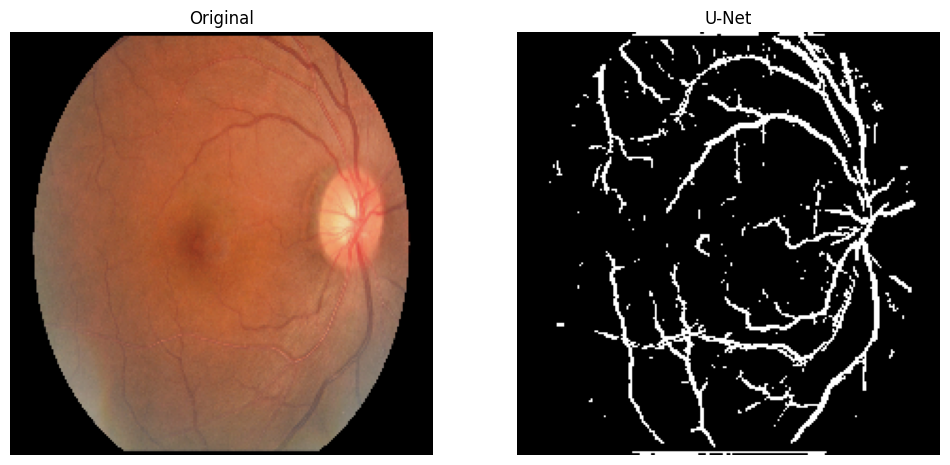

In [247]:
ddr_images_test = unet_model.predict(X_test)

r1 = 0.99
unet_predict1 = (ddr_images_test > r1).astype(np.uint8)
idx = random.sample(range(len(ddr_images_test)), 1)

fig, axs = plt.subplots(1, 2, figsize=(12,12))
axs[0].set_title("Original")
axs[0].imshow(X_test[idx][0])
axs[0].axis('off')

axs[1].set_title("U-Net")
axs[1].imshow(unet_predict1[idx][0],cmap='gray')
axs[1].axis('off')